In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 3s 0us/step


In [3]:
from tensorflow.keras.utils import to_categorical

print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [5]:
import numpy as np
classes = np.unique(train_labels)
classes_num = len(classes)
print('Total number of outputs : ', classes_num)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 5')

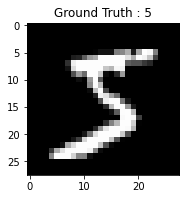

In [8]:
import matplotlib.pyplot as plt
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))


Text(0.5, 1.0, 'Ground Truth : 7')

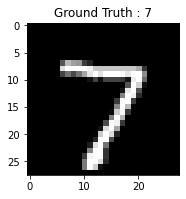

In [9]:
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

In [10]:
dim_data = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dim_data)
test_data = test_images.reshape(test_images.shape[0], dim_data)

In [11]:
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [12]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dim_data,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(classes_num, activation='softmax'))

In [14]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/20
235/235 [==============================] - 11s 44ms/step - loss: 0.0909 - accuracy: 0.9930 - val_loss: 0.5975 - val_accuracy: 0.9772
Epoch 2/20
235/235 [==============================] - 7s 31ms/step - loss: 0.0823 - accuracy: 0.9938 - val_loss: 0.6955 - val_accuracy: 0.9761
Epoch 3/20
235/235 [==============================] - 7s 31ms/step - loss: 0.0813 - accuracy: 0.9937 - val_loss: 0.6034 - val_accuracy: 0.9788
Epoch 4/20
235/235 [==============================] - 7s 31ms/step - loss: 0.0806 - accuracy: 0.9934 - val_loss: 0.6002 - val_accuracy: 0.9782
Epoch 5/20
235/235 [==============================] - 7s 31ms/step - loss: 0.0729 - accuracy: 0.9943 - val_loss: 0.8181 - val_accuracy: 0.9735
Epoch 6/20
235/235 [==============================] - 8s 33ms/step - loss: 0.0847 - accuracy: 0.9941 - val_loss: 0.7025 - val_accuracy: 0.9770
Epoch 7/20
235/235 [==============================] - 7s 32ms/step - loss: 0.0795 - accuracy: 0.9941 - val_loss: 0.8382 - val_accuracy: 0.974

In [17]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 3s 10ms/step - loss: 1.0879 - accuracy: 0.9802
Evaluation result on Test Data : Loss = 1.0879015922546387, accuracy = 0.9801999926567078
